In [1]:
import math

initial_coef = np.array([1.0, 1.0, 1.0],  dtype=np.float64)
print("Initial structure: a   = %f,   b = %f,   c = %f" % (initial_coef[0], initial_coef[1], initial_coef[2]))

parabola_arg = np.array([1.0, 2.0, 3.0],  dtype=np.float64)
print("Initial arguments: x_1 = %f, x_2 = %f, x_3 = %f" % (parabola_arg[0], parabola_arg[1], parabola_arg[2]))


def parabola(x):
    return initial_coef[0]*(x**2) + initial_coef[1]*x + initial_coef[2]


candidates = np.array([ parabola(parabola_arg[0]), parabola(parabola_arg[1]), parabola(parabola_arg[2])],  dtype=np.float64)    
print("Initial parabola value: d_1 = %f, d_2 = %f, d_3 = %f" % (candidates[0], candidates[1], candidates[2]))
parabola_coefficients = {'a': 0.0, 'b': 0.0, 'c': 0.0}
# print(parabola_arg)
denominator = \
    parabola_arg[0] * np.power(parabola_arg[1], 2) - np.power(parabola_arg[0], 2) * parabola_arg[1] \
    - parabola_arg[0] * np.power(parabola_arg[2], 2) + parabola_arg[1] * np.power(parabola_arg[2], 2) \
    + np.power(parabola_arg[0], 2) * parabola_arg[2] - np.power(parabola_arg[1], 2) * parabola_arg[2]

parabola_coefficients['a'] = \
    - parabola_arg[1] * candidates[0] + parabola_arg[2] * candidates[0] \
    + parabola_arg[0] * candidates[1] - parabola_arg[2] * candidates[1] \
    - parabola_arg[0] * candidates[2] + parabola_arg[1] * candidates[2]

parabola_coefficients['b'] = \
    np.power(parabola_arg[1], 2) * candidates[0] - np.power(parabola_arg[2], 2) * candidates[0] \
    - np.power(parabola_arg[0], 2) * candidates[1] + np.power(parabola_arg[2], 2) * candidates[1] \
    + np.power(parabola_arg[0], 2) * candidates[2] - np.power(parabola_arg[1], 2) * candidates[2]

parabola_coefficients['c'] = \
    parabola_arg[1] * np.power(parabola_arg[2], 2) * candidates[0] - np.power(parabola_arg[1], 2) * parabola_arg[2] * candidates[0] \
    - parabola_arg[0] * np.power(parabola_arg[2], 2) * candidates[1] + np.power(parabola_arg[0], 2) * parabola_arg[2] * candidates[1] \
    + parabola_arg[0] * np.power(parabola_arg[1], 2) * candidates[2] - np.power(parabola_arg[0], 2) * parabola_arg[1] * candidates[2]

print("Counted fraction value: a = %f/%f, b = %f/%f, c = %f/%f" % (parabola_coefficients['a'], denominator, parabola_coefficients['b'], denominator, parabola_coefficients['c'], denominator))
skip = False
for coef in parabola_coefficients:
    parabola_coefficients[coef] = parabola_coefficients[coef] / denominator
    if not math.isnan(parabola_coefficients[coef]):
        print("Resulting coefficients ", coef, ": ", parabola_coefficients[coef])
    else:
        skip = True


NameError: name 'np' is not defined

In [1]:
import numpy as np
import random as pyrandom
import sys, os
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
from parse_input import *


# atoms.txt Содержит информацию об атомах, в колонках следующие данные:
# ID, x, y, z, сигма, эпсилон, заряд, 
# радиус Ван-дер-Ваальса, объём и еще две колонки типа строки; 
# радиус и объем и эти две колонки не используются далее
atoms = rd('atoms.txt', 1, 9)  # вместо 9 можно было и 7 взять

# bonds.txt Содержит информацию о связях, структура файла:
# ID1, ID2, Kr, r0
bonds = rd('bonds.txt', 2)

# angles.txt Содержит информацию об углах, структура файла:
# ID1, ID2, ID3, Kt, theta0
angles = rd('angles.txt', 3)

# dihedrals.txt Содержит информацию о двугранных углах, структура:
# ID1, ID2, ID3, ID4, V1, V2, V3, V4
# Все константы V1, V2, V3, V4 разделены на два, 
# при вычислении энергии делить их на два НЕ НАДО.
dihedrals = rd('dihedrals.txt', 4)

# neighbours.txt, two_bonds_neigh.txt, three_bonds_neigh.txt
# Содержат информацию о соседях непосредственных, 
# второго и третьего порядка соответственно. 
# У всех одна и та же структура:
# ID    id_1 id_2 ... id_n
# ID – индекс атома, id_1 id_2 ... id_n – индексы его соседей.
neighbours = rd('neighbours.txt')
two_bonds_neigh = rd('two_bonds_neigh.txt')

three_bonds_neigh = rd('three_bonds_neigh.txt')

In [ ]:
from output import *
from energy import *
from itertools import cycle

N = 1500  # 10000 # число итераций
l = len(atoms)  # число атомов в изучаемом белке
h = [0.02, 0.02, 0.02]  # размеры шагов по ортам в ангстремах
# L = 3  # сколько шагов делаем вдоль каждого орта с учетом знака
S = 0
r = 10  # размер окрестности атома, по которой честно суммируем
M = 500  # параметр, отвечающий за частоту вывода и сохранения информации
mas = []
tt = []
time_start = millis()
how_much = 0

for k in range(0, N):
	num = pyrandom.randrange(0, l)
	# это просто печать результатов в файлы и отображения хода работы метода
	if k/M == int(k/M):
		# prp_atm(atoms, k)
		# os.system('./to-pdb atoms_out' + str(k) + '.csv output' + str(k) + '.pdb')
		time_now = millis()
		tm = (time_now - time_start)/60000
		print("################################")
		print("Число итераций {}; Энергия {}; Время (мин) {}".format(k, S, tm))
		print("################################\n")
	nghb_d = nghb_dihedrals(dihedrals, num)
	nghb_a = nghb_angles(angles, num)
	nghb_b = nghb_bonds(bonds, num)
	nghb_nb = nghbnb(atoms, num, r)[0]
	nghbc = nghbnb(atoms, num, r)[1]
	[Cx, Cy, Cz] = coef_nb(atoms, num, nghbc)
	DE_elst = E_elst(atoms, neighbours, two_bonds_neigh, three_bonds_neigh, num) - \
		  E_elst_m(atoms, neighbours, two_bonds_neigh, three_bonds_neigh, num, nghb_nb)    
	E_old = E(atoms, dihedrals, angles, bonds, neighbours, two_bonds_neigh,
			  three_bonds_neigh, num, nghb_d, nghb_a, nghb_b, nghb_nb, full=True)
	E_record = E_old
	
	candidates = np.array([0.0, 0.0, 0.0], dtype=np.float64)
	actual = np.array([0.0, 0.0, 0.0], dtype=np.float64)
	parabola_arg = np.array([0.0, 0.0, 0.0], dtype=np.float64)
	
	coefs = [Cx, Cy, Cz]
	coors = [1, 2, 3]
	
	possibilities = [[0, 0, 0], [0, 0, 0]]
	cands = [[], [], []]
	
	for ort in range(3):
		c = coefs[ort]
		which_coor = coors[ort]
		
		prev = atoms[num][which_coor]
		
		for indent in [-1, 0, 1]:
			parabola_arg[1 + indent] = np.float64(prev + indent * h[ort])
			atoms[num][which_coor] = prev + indent * h[ort]
			# candidates[1 + indent] = DE_elst + c * indent * h[0] + \
			# 						 E(atoms, dihedrals, angles, bonds, neighbours, two_bonds_neigh,
			# 						   three_bonds_neigh, num, nghb_d, nghb_a, nghb_b, nghb_nb, full=False)
			actual[1 + indent] = E(atoms, dihedrals, angles, bonds, neighbours, two_bonds_neigh,
									   three_bonds_neigh, num, nghb_d, nghb_a, nghb_b, nghb_nb, full=True)
			#print("\tatom: ", prev, " point: ", np.float64(prev + indent * h[0]), \
				#  "\n\t\tenergy: ", candidates[1 + indent], " DE_elst: ", DE_elst, " C: ", c)
			# print("Old atoms: ", atoms_old[num][where], " Orig atoms: ", atoms[num][where])
		
		cands[ort] = [actual[0], actual[1], actual[2]]
		ret = suppose_parabola(parabola_arg, actual)
		
		possibilities[0][ort] = ret.E
		possibilities[1][ort] = ret.arg
		
		atoms[num][which_coor] = prev
	
	where = int(np.argmin(possibilities[0]))
	E_new = possibilities[0][where]
	parabola_min_arg = possibilities[1][where]
	# print("E_new: ", E_new, " E_old: ", E_old)
	# print("Suppose minimum: ", E_new)
	ind = int(np.argmin(candidates))
	E_cand = candidates[ind]
	
	energies = np.array([E_new, E_cand, E_old])
	minimum_eng = np.argmin(energies)
	E_new = energies[minimum_eng]
	if minimum_eng == 2:
		# print("Parabola is not at minimum.")
		# print("We will do nothing.")
		parabola_min_arg = 0
	elif minimum_eng == 1:
		# print("Parabola is not at minimum.")
		parabola_min_arg = parabola_arg[ind]
		# print("Actual minimum: ", E_new)
		# atoms[num][coors[ind]] = parabola_min_arg
	else:
		orta = '\'\''
		if where == 0:
			orta = 'x'
		elif where == 1:
			orta = 'y'
		elif where == 2:
			orta = 'z'
		print("Ort: ", orta, " and num of atom: ", num)
		print("Prev value: ", atoms[num][coors[where]], " new: ", parabola_min_arg)
		print("Possibilities: \n\t eng:", possibilities[0], \
			  "\n\t cands: \n\t\t x: ", cands[0], "\n\t\t y: ", cands[1], "\n\t\t z: ", cands[2])
		print("E_new: ", E_new, "\tE_old: ", E_old, "\tDE_elst: ", DE_elst, "\n")
	# print("Parabola works.!!")
	atoms[num][coors[where]] = parabola_min_arg
	
	
		# "-0.2" чтобы не учитвать погрешности в аппроксимации
	if np.float64((E_record - E_new)/ E_record) < 0.05:
		E_record = E_new
	
	S = S + E_old - E_record
	mas.append(S)
	time_now = millis()
	ttm = (time_now - time_start) / 60000
	tt.append(ttm)
	
print(S)

################################
Число итераций 0; Энергия 0; Время (мин) 0.0
################################

Ort:  z  and num of atom:  1126
Prev value:  24.898  new:  24.901004663504917
Possibilities: 
	 eng: [-16.94107528688619, -16.94211420200736, -16.942175594362197] 
	 cands: 
		 x:  [-16.748967932639353, -16.939659815902477, -16.80920868999846] 
		 y:  [-16.55629552191563, -16.939659815902477, -16.42338784407091] 
		 z:  [-16.794698027457184, -16.939659815902477, -16.861683442738837]
E_new:  -16.942175594362197 	E_old:  -16.939659815902477 	DE_elst:  3.1824687876945283 

Ort:  x  and num of atom:  1117
Prev value:  29.432  new:  29.427604995697077
Possibilities: 
	 eng: [-297.02769229817204, -296.98394663277213, -296.9839763613418] 
	 cands: 
		 x:  [-296.47749271553687, -296.98394661968473, -295.68324859363946] 
		 y:  [-296.0443112577775, -296.98394661968473, -296.0454889908232] 
		 z:  [-295.5949669854964, -296.98394661968473, -295.5928599932285]
E_new:  -297.02769229817204

D:\python_proj\diploma\energy\__init__.py:31: RuntimeWarning: invalid value encountered in arccos
  acos = np.arccos(cos)


Ort:  z  and num of atom:  355
Prev value:  24.846  new:  nan
Possibilities: 
	 eng: [1.2860829598176807e+36, 1.2860829598176807e+36, nan] 
	 cands: 
		 x:  [2.7074840760351775e+26, 1.2860831592089248e+36, 2.8676624223421195e+27] 
		 y:  [2.7074840760351775e+26, 1.2860831592089248e+36, 2.8676624223421195e+27] 
		 z:  [nan, 1.2860831592089248e+36, 2.867662422342115e+27]
E_new:  nan 	E_old:  1.2860831592089248e+36 	DE_elst:  1.1833943303452088 

Ort:  x  and num of atom:  617
Prev value:  18.821  new:  nan
Possibilities: 
	 eng: [nan, nan, nan] 
	 cands: 
		 x:  [nan, nan, nan] 
		 y:  [nan, nan, nan] 
		 z:  [nan, nan, nan]
E_new:  nan 	E_old:  nan 	DE_elst:  nan 

Ort:  x  and num of atom:  667
Prev value:  18.7355608050413  new:  nan
Possibilities: 
	 eng: [nan, nan, nan] 
	 cands: 
		 x:  [nan, nan, nan] 
		 y:  [nan, nan, nan] 
		 z:  [nan, nan, nan]
E_new:  nan 	E_old:  nan 	DE_elst:  nan 

Ort:  x  and num of atom:  392
Prev value:  13.26  new:  nan
Possibilities: 
	 eng: [nan, na

In [8]:
from output import *
from energy import *

atoms = rd('atoms.txt', 1, 9)

N = 300  # 10000 # число итераций
l = len(atoms) # число атомов в изучаемом белке
L = 3 # сколько шагов делаем вдоль каждого орта с учетом знака
S = 0
r = 10 # размер окрестности атома, по которой честно суммируем
M = 1000 # параметр, отвечающий за частоту вывода и сохранения информации
h = [0.02, 0.02, 0.02]  # размеры шагов по ортам в ангстремах

mas_orig = []
tt_orig = []
time_start = millis()

for k in range(0,N):
	num = pyrandom.randrange(0, l)
	atoms_old = [atoms[num][1], atoms[num][2], atoms[num][3]]
	record = [0,0,0]
	if k/M == int(k/M):
		time_now = millis()
		tm = (time_now - time_start)/60000
		print("################################")
		print("Число итераций {}; Энергия {}; Время (мин) {}".format(k, S, tm))
		print("################################\n")
	nghb_d = nghb_dihedrals(dihedrals, num)
	nghb_a = nghb_angles(angles, num)
	nghb_b = nghb_bonds(bonds, num)
	nghb_nb = nghbnb(atoms, num, r)[0]
	nghbc = nghbnb(atoms, num, r)[1]
	[Cx,Cy,Cz] = coef_nb(atoms,num,nghbc)
	DE_elst = E_elst(atoms, neighbours, two_bonds_neigh, three_bonds_neigh,num) - E_elst_m(atoms, neighbours, two_bonds_neigh, three_bonds_neigh,num,nghb_nb)

	E_old = E(atoms, dihedrals, angles, bonds, neighbours, two_bonds_neigh, three_bonds_neigh, num, nghb_d, nghb_a, nghb_b, nghb_nb, full = True)
	E_record = E_old

	for px in range(-L,L+1):
		for py in range(-L,L+1):
			for pz in range(-L,L+1):
				# print("Record: ", [px, py, pz])
				atoms[num][1] = atoms_old[0] + px*h[0]
				atoms[num][2] = atoms_old[1] + py*h[1]
				atoms[num][3] = atoms_old[2] + pz*h[2]
				E_new = DE_elst + Cx*px*h[0] + Cy*py*h[1] + Cz*pz*h[2] + \
						E(atoms, dihedrals, angles, bonds, neighbours, two_bonds_neigh, three_bonds_neigh, num, nghb_d, nghb_a, nghb_b, nghb_nb, full=False)
				if E_new < E_record: #  "-0.2" чтобы не учитвать погрешности в аппроксимации
					record = [px, py, pz]
					print("Prev value: ", atoms_old, " new: ", [atoms[num][1], atoms[num][2], atoms[num][3]])
					print("\nE_new: ", E_new, "\tE_old: ", E_old, "\tDE_elst: ", DE_elst)
					E_record = E_new
	
	atoms[num][1] = atoms_old[0] + record[0]*h[0]
	atoms[num][2] = atoms_old[1] + record[1]*h[1]
	atoms[num][3] = atoms_old[2] + record[2]*h[2]
	S = S + E_old - E_record
	mas_orig.append(S)
	time_now = millis()
	ttm = (time_now - time_start)/60000
	tt_orig.append(ttm)
print(S)

################################
Число итераций 0; Энергия 0; Время (мин) 1.6666666666666667e-05
################################

Prev value:  [11.278, -1.232, 32.234]  new:  [11.278, -1.252, 32.174]

E_new:  -273.94720398254424 	E_old:  -273.66559204111485 	DE_elst:  6.930873367687411
Prev value:  [11.278, -1.232, 32.234]  new:  [11.278, -1.232, 32.194]

E_new:  -274.026815693388 	E_old:  -273.66559204111485 	DE_elst:  6.930873367687411
Prev value:  [11.278, -1.232, 32.234]  new:  [11.278, -1.232, 32.214]

E_new:  -274.130385464086 	E_old:  -273.66559204111485 	DE_elst:  6.930873367687411
Prev value:  [12.751, 10.541, 24.436]  new:  [12.731, 10.521, 24.476]

E_new:  -141.73101726800363 	E_old:  -141.7034190789212 	DE_elst:  47.11949911759754
Prev value:  [12.751, 10.541, 24.436]  new:  [12.731, 10.521, 24.496]

E_new:  -141.97474584333517 	E_old:  -141.7034190789212 	DE_elst:  47.11949911759754
Prev value:  [12.751, 10.541, 24.436]  new:  [12.731, 10.541, 24.496]

E_new:  -142.111857

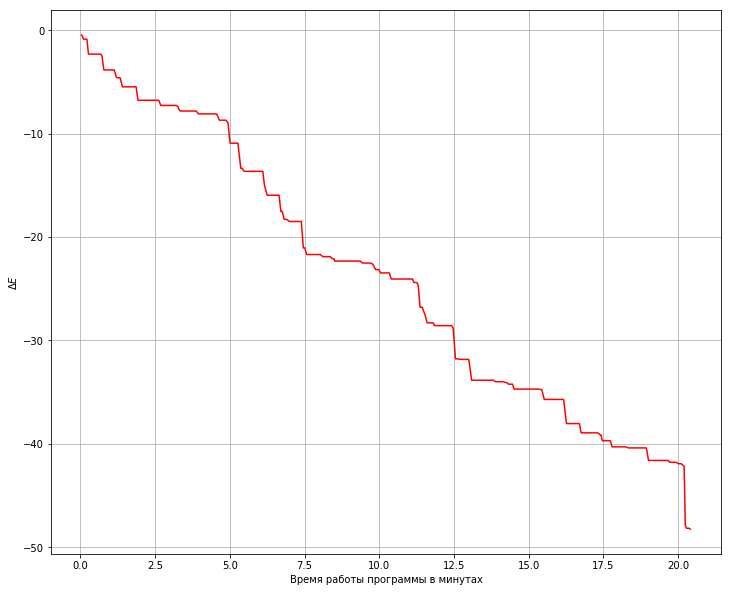

In [10]:
import matplotlib.pyplot as plt

# mmas = - np.array(mas)
mmas_orig = - np.array(mas_orig)

plt.figure(figsize=(12,10))
# tt, mmas, 'b',
plt.plot( tt_orig, mmas_orig, 'r')
plt.xlabel(r"Время работы программы в минутах")
plt.ylabel(r"$\Delta E$")
plt.grid(True)
plt.interactive(False)
plt.show()

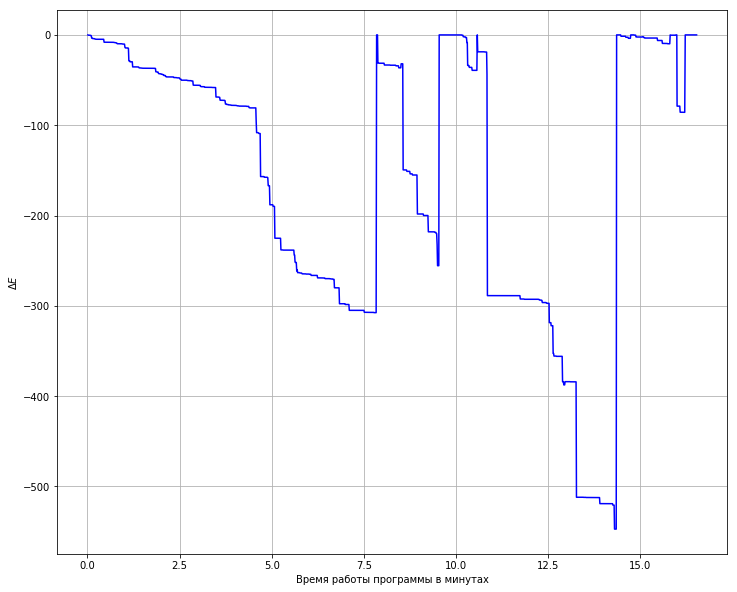

In [4]:
import matplotlib.pyplot as plt

mmas = - np.array(mas)
# mmas_orig = - np.array(mas_orig)

plt.figure(figsize=(12,10))
plt.plot(tt, mmas, 'b')#, tt_orig, mmas_orig, 'r')
plt.xlabel(r"Время работы программы в минутах")
plt.ylabel(r"$\Delta E$")
plt.grid(True)
plt.interactive(False)
plt.show()

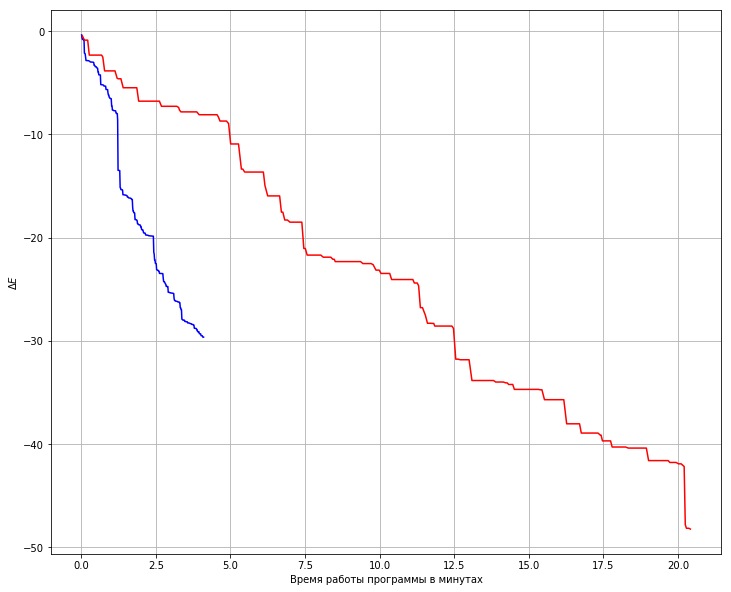

In [19]:
import matplotlib.pyplot as plt

mmas = - np.array(mas)
mmas_orig = - np.array(mas_orig)

plt.figure(figsize=(12,10))
plt.plot(tt, mmas, 'b', tt_orig, mmas_orig, 'r')
plt.xlabel(r"Время работы программы в минутах")
plt.ylabel(r"$\Delta E$")
plt.grid(True)
plt.interactive(False)
plt.show()

Energy:  -32.55971244386966


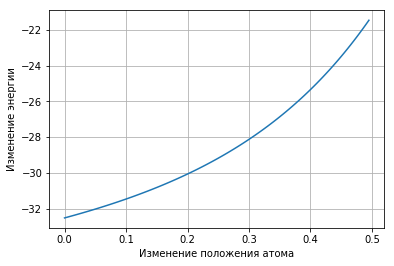

-21.47003065706592


In [13]:
num = 280
coor = 2
h = 0.005
M = 100
mmm = []
ccc = []

print("Energy: ", E(atoms, dihedrals, angles, bonds, neighbours, two_bonds_neigh, three_bonds_neigh, num, nghb_d, nghb_a, nghb_b, nghb_nb, full=True))

# print(E(atoms, dihedrals, angles, bonds, neighbours, two_bonds_neigh, three_bonds_neigh,nm))
for k in range(0, M):
    atoms[num][coor] = atoms[num][coor] + h
    EE = E(atoms, dihedrals, angles, bonds, neighbours, two_bonds_neigh, three_bonds_neigh, 
           num, nghb_d, nghb_a, nghb_b, nghb_nb, full=True) 
    # E(atoms, dihedrals, angles, bonds, neighbours, two_bonds_neigh, three_bonds_neigh,nm)
    mmm.append(EE)
    ccc.append(k*h)  

import matplotlib.pyplot as plt
plt.plot(ccc, mmm)
plt.ylabel(r"Изменение энергии")
plt.xlabel(r"Изменение положения атома")
plt.grid(True)
plt.show()
    
print(E(atoms, dihedrals, angles, bonds, neighbours, two_bonds_neigh, three_bonds_neigh, num, nghb_d, nghb_a, nghb_b, nghb_nb, full=True))

# print(E(atoms, dihedrals, angles, bonds, neighbours, two_bonds_neigh, three_bonds_neigh,nm))